In [1]:
import networkx as nx
from scipy.stats import qmc
from scipy.spatial import distance
import pandas as pd
import numpy as np
import random
from math import sqrt
from time import time
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
elist = [(1,x) for x in range(2,152)]
G.add_edges_from(elist)

In [9]:
colormap = []
colormap.append('red')
for i in range(2,152):
  colormap.append('#2F77F2')

pos = nx.spring_layout(G)

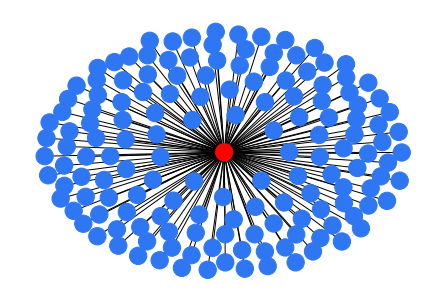

In [10]:
nx.draw(G, node_color=colormap, pos=pos)

In [5]:
len(elist)

150

In [11]:
elist = [('c', 2),('c', 3),('c', 4),('c', 5),('c', 6)]
G.add_edges_from(elist)
colormap.append('green')
pos = nx.spring_layout(G)

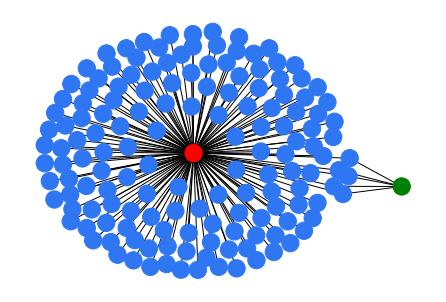

In [12]:
nx.draw(G, node_color=colormap, pos=pos)

In [13]:
lista = list(range(7,152))

In [14]:
def clon_tuple(rnd, i, aux):
  clon_list = list()
  for j in aux:
    clon_list.append(("c"+str(i), j))

  return clon_list


In [15]:
i = 1

while lista:
  rnd = random.randint(1, 5)
  aux = lista[:rnd]
  edge_list = clon_tuple(rnd, i, aux)
  G.add_edges_from(edge_list)

  del lista[:rnd]
  i += 1

In [16]:
for i in range(len([x for x in list(G.nodes) if str(x).startswith('c')])):
  colormap.append('green')

In [17]:
del colormap[-1]

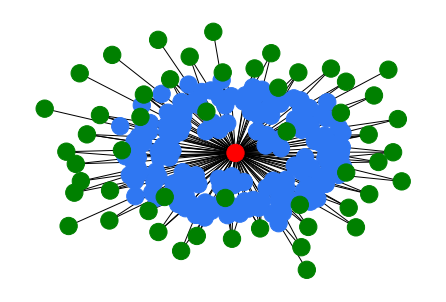

In [18]:
nx.draw(G, node_color=colormap)

In [14]:
s1 = pd.Series({k:v for k,v in nx.degree_centrality(G).items() if str(k).startswith('c')}, name='Degree')
s1 = s1.apply(lambda x:(x-s1.min())/(s1.max()-s1.min()))

s2 = pd.Series({k:v for k,v in nx.eigenvector_centrality(G).items() if str(k).startswith('c')}, name='eigenvector_centrality')
s2 = s2.apply(lambda x:(x-s2.min())/(s2.max()-s2.min()))

s3 = pd.Series({k:v for k,v in nx.closeness_centrality(G).items() if str(k).startswith('c')}, name='closeness_centrality')
s3 = s3.apply(lambda x:(x-s3.min())/(s3.max()-s3.min()))

s4 = pd.Series({k:v for k,v in nx.katz_centrality_numpy(G).items() if str(k).startswith('c')}, name='katz_centrality')
s4 = s4.apply(lambda x:(x-s4.min())/(s4.max()-s4.min()))

s5 = pd.Series({k:v for k,v in nx.betweenness_centrality(G).items() if str(k).startswith('c')}, name='betweenness_centrality')
s5 = s5.apply(lambda x:(x-s5.min())/(s5.max()-s5.min()))

s6 = pd.Series({k:v for k,v in nx.pagerank(G).items() if str(k).startswith('c')}, name='pagerank')
s6 = s6.apply(lambda x:(x-s6.min())/(s6.max()-s6.min()))


df = pd.concat([s1, s2, s3, s4, s5, s6], axis=1)
df

/Users/francisco/opt/anaconda3/envs/socialz4/lib/python3.9/site-packages/networkx/algorithms/centrality/katz.py:325: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=nodelist, weight=weight).todense().T


,Degree,eigenvector_centrality,closeness_centrality,katz_centrality,betweenness_centrality,pagerank
c,1.00,1.000000,1.000000,1.000000e+00,1.0,1.00
c1,0.75,0.744988,0.747671,7.421875e-01,0.6,0.75
c2,0.25,0.245054,0.247685,2.423469e-01,0.1,0.25
c3,1.00,1.000000,1.000000,1.000000e+00,1.0,1.00
c4,0.25,0.245054,0.247685,2.423469e-01,0.1,0.25
c5,1.00,1.000000,1.000000,1.000000e+00,1.0,1.00
c6,0.00,0.000000,0.000000,1.292524e-15,0.0,0.00
c7,0.00,0.000000,0.000000,1.938785e-15,0.0,0.00
c8,0.00,0.000000,0.000000,1.292524e-15,0.0,0.00
c9,0.00,0.000000,0.000000,8.078273e-16,0.0,0.00


In [15]:
def objective(candidate):
  return qmc.discrepancy(candidate, method='L2-star',workers=-1)

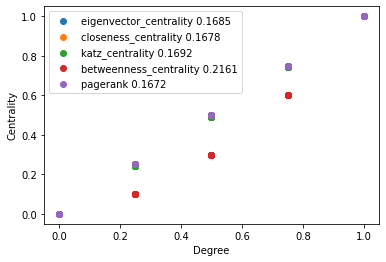

In [16]:
fig, ax = plt.subplots()
for centrality in ['eigenvector_centrality','closeness_centrality','katz_centrality','betweenness_centrality','pagerank']:
  score = f"{centrality} {objective(df[['Degree',centrality]]):.4f}"
  ax.scatter(df['Degree'], df[centrality], label=score)

ax.set_xlabel('Degree')
ax.set_ylabel('Centrality')
ax.legend()
plt.show()

In [17]:
df = pd.concat([s1, s6], axis=1)

Facebook attributes, about section:
1. Work
2. **Education**
3. Professional skills
4. Current city
5. **Hometown**
6. Places lived
7. Mobile phone
8. Website
9. Email
10. Address
11. **Birth date**
12. **Gender**
13. Interested in
14. Religious views
15. Language
16. Political views
17. Relationship
18. Family members
19. **About you (e.g., short description about yourself)**
20. Other names (e.g., nickname)
21. **Name**
22. **Photo**


Let  $P_c$  be  the  public  profile  of  a  candidate  identity  c  and  $P_v$  be  the  public  profile  of  a  victim  v.  Let  $SA_{cv}$ denote  the  number  of  the  attributes  for  which  $P_c$  and  $P_v$ have similar  values.  

1. We  define  the  attribute  similarity  of  two  profiles,  $S_{att}$, as:

\begin{align}
        S_{att}(P_c,P_v) = \frac{SA_{cv}}{\sqrt{|A_c|×|A_V|}}
    \end{align}

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;where $|A_c|$  and  $|A_v|$  represents  the  number  of  attributes  in  $P_v$  and  $P_v$, respectively.

2. The similarity  between  the  FLs  in  two  identities  as  $S_{ff}$:

\begin{align}
        S_{ff}(P_c,P_v) = \frac{|MFF_{cv}|}{\sqrt{|F_c|×|F_V|}}
    \end{align}

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;where $MFF_{cv}$  denotes  the  set  of  mutual  friends  common  in  the  FLs  of $P_c$ and $P_v$

3. Given a public profile $P_c$ of a candidate identity c and a public profile $P_v$ of a victim v, we define the Basic Profile Similarity of these two identities as $S_{BPS}$:

\begin{align}
        S_{bps}(P_c,P_v) = \frac{\sqrt{(kS_{att})^2(xS_{ff})^2}}{\sqrt{k^2×x^2}}
    \end{align}

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;where κ and χ are the parameters to balance the effect of attribute similarity andfriend network similarity on the BPS.

In [18]:
def sim_attributes(pc,pv):

  sa = 0
  for i, j in zip(pv, pc):
    if i != 0 and i == j:
      sa +=1

  ac = abs(sum(pc))
  av = abs(sum(pv))
  
  return sa/sqrt(ac*av)

def sim_network(pc,pv):

  mff = 0
  for i, j in zip(pv, pc):
    if i != 0 and i == j:
      mff +=1

  fc = abs(sum(pc))
  fv = abs(sum(pv))
  
  return abs(mff)/sqrt(fc*fv)


def sim_profile(a_pc,a_pv,f_pc,f_pv):
  
  s_att = sim_attributes(a_pc,a_pv)
  s_ff = sim_network(f_pc,f_pv)

  return sqrt((s_att**2)*(s_ff**2))


In [19]:
a_pv = np.array([0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1])

In [20]:
am = nx.to_pandas_adjacency(G)
profile_sim = list()

for i in range(len(df)):
  a_pc = 
  profile_sim.append(sim_profile(a_pc, a_pv, am.iloc[151+i], am.iloc[0]))

In [21]:
s3 = pd.Series(profile_sim, index=df.index, name='Profile_sim')
s3 = s3.apply(lambda x:(x-s3.min())/(s3.max()-s3.min()))
df = pd.concat([df, s3], axis=1)
df

,Degree,pagerank,Profile_sim
c,1.00,1.00,0.713988
c1,0.75,0.75,0.581883
c2,0.25,0.25,0.115869
c3,1.00,1.00,0.640295
c4,0.25,0.25,0.730638
c5,1.00,1.00,0.903981
c6,0.00,0.00,0.102817
c7,0.00,0.00,0.385004
c8,0.00,0.00,0.286564
c9,0.00,0.00,0.172677


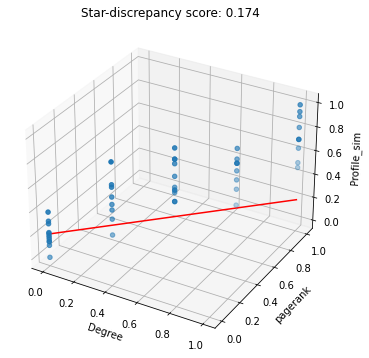

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,6), subplot_kw=dict(projection='3d'))
ax.scatter3D(df['Degree'],df['pagerank'],df['Profile_sim'])
ax.plot([0, 1], # x
        [0, 1], # y
        [0.2, 0.2], color='red') # z 
ax.set_xlabel('Degree')
ax.set_ylabel('pagerank')
ax.set_zlabel('Profile_sim')
ax.set_title(f'Star-discrepancy score: {objective(df):.3f}')
plt.show()

In [58]:
a = np.array([[0,1,1,0],
            [0,1,0,1]])
b = np.array([[0,1,0,1],
             [0,1,1,0]])


# Numpy: The ^ operator can be used as a shorthand for np.bitwise_xor on ndarrays.
c = a ^ b

In [59]:
c

array([[0, 0, 1, 1],
       [0, 0, 1, 1]])

In [63]:
distance.directed_hausdorff(a,c)

(1.4142135623730951, 0, 0)

In [64]:
distance.cdist(a,c)

array([[1.41421356, 1.41421356],
       [1.41421356, 1.41421356]])

In [65]:
distance.cdist(a,b)

array([[1.41421356, 0.        ],
       [0.        , 1.41421356]])

In [66]:
distance.directed_hausdorff(a,b)

(0.0, 0, 1)

In [192]:
# Uniform distribution of messages for each clone.

clones = []
victim_indexes = list(range(0,5000))
exclude_indexes = []

for i in range(125):
    choose_from = list(set(victim_indexes) - set(exclude_indexes))
    c = np.zeros(5000)
    rnd = random.sample(choose_from, k=40)
    exclude_indexes.extend(rnd)
    np.put(c,rnd,1)
    clones.append(c)

In [194]:
len(clones)

125

In [195]:
random.randint(0,4999)

3679

In [ ]:
def change(c[idx]):
    c[idx] = 1

In [ ]:
for clone in clones:
    if clone[idx] == 1:
        clone[idx] = 0

In [200]:
idx = 1
clones = np.array([[0,0,1],[0,1,0],[1,0,0]])

In [201]:
[np.put(clone,idx,0) for clone in clones if clone[idx] == 1]

[None]

In [202]:
clones

array([[0, 0, 1],
       [0, 0, 0],
       [1, 0, 0]])

In [ ]:
def mutate(clone, profiles):

    clone_idx = random.choice(range(len(clones)))
    clone = clones[clone_idx]
    profile = profiles[clone_idx]

    chance = random.choice(['add_edge','del_edge','mutate_profile'])

    if chance == 'add_edge':
        
        idx = None
        while idx is None:
            aux = random.randit(0,4999)
            if clone[aux] is not 1:
                idx = aux

            # first delete connection with other clone.
            for c in clones:
                if c[idx] == 1:
                    c[idx] = 0
            # then assing the connection to this clone.
            clone[idx] = 1

    elif chance == 'del_edge':

        idx = None
        while idx is None:
            aux = random.randit(0,4999)
            if clone[aux] is not 0: 
                idx = aux            
        
            # first delete connection with other clone.
            clone[idx] = 0
            # then assing the connection to another random clone.
            rnd_clone = None
            while rnd_clone is None:
                aux = random.choice(clones)
                if aux is not clone and aux[idx] is 0:
                    rnd_clone = aux
                    rnd_clone[idx] = 1

    elif chance == 'mutate_profile':
        
        new_profile = None
        while new_profile is None:
            aux = np.random.randint(2, size=21)
            if profile is not aux:
                new_profile = aux



In [ ]:
# evolution strategy (mu, lambda) algorithm

def es_plus(edge_list, users, repos, objective, n_iter, mu, lam, centrality):
  best, best_eval, start = None, 1e+10, time.time()

	# calculate the number of children per parent
  n_children = int(lam / mu)
	
  # initial population
  population = list()
  
  for i in range(lam):
    candidate = edge_list.copy()            # copy the initial edge_list
    population.append(candidate)            # add to population

  # perform the search
  for epoch in range(n_iter):
    # evaluate the fitness for the population
    scores = [objective(graph_metrics(candidate,centrality)) for candidate in population]
    # rank scores in ascending order
    ranks = np.argsort(np.argsort(scores))
    # select the indexes for the top mu ranked solutions, drop the worse results	
    selected = [i for i,_ in enumerate(ranks) if ranks[i] < mu]
    # create offspring from parents
    offspring = list()
    for i in selected:
      # check if this parent is the best solution ever seen
      if scores[i] < best_eval:
        best, best_eval, niter = population[i], scores[i], epoch
        print('%d, Best eval: = %.5f' % (epoch, best_eval))
        
      # keep the parent
      offspring.append(population[i])

      # create offspring for parent
      for j in range(n_children):
        sample = np.random.choice(users)
        child = mutate(population[i], sample, repos)
        offspring.append(child)

    # replace population with children
    population = offspring
  
  end = time.time()
  total_time = end - start
  return [niter, best, best_eval, total_time]